In [70]:
using CSV, DataFrames, Plots, StatsPlots, Missings
using Flux
using MLDataUtils
using PyCall

# Hotdog Analysis

This is a physical chemist trying to do social psychology with data science: we have a small dataset of demographics, and we'd like to try and see if there's any correlation (maybe even causation) between features and the likelihood someone will think a hotdog is a sandwich.

In [55]:
P = download("https://docs.google.com/spreadsheets/d/1uv0IOtBCdpql3y926MtoT0wrHU3T7KGtLKIJ1FZMkjo/export?format=csv&gid=176397632", "responses.csv")

"responses.csv"

In [56]:
data = CSV.read("responses.csv");
# remove the last two columns where Marie wrote some stuff
data = data[:,1:7];

thread = 1 warning: only found 8 / 9 columns on data row: 147. Filling remaining columns with `missing`


In [57]:
# rename the columns
rename!(data, [:Date, :Email, :Name, :TimeZone, :Org, :Position, :Hotdog]);

## Data cleaning

In [58]:
# remove entries with missing responses
dropmissing!(data);

In [59]:
# encode hotdog responses as bool for logistic regression later
hotdog_bool = Dict("Yes" => Float32(1.), "No" => Float32(0.))

Dict{String,Float32} with 2 entries:
  "Yes" => 1.0
  "No"  => 0.0

In [60]:
# Create a new column
data.HotDogEncoding = map(val -> hotdog_bool[val], data.Hotdog);

In [61]:
data[!, :PosEncoding] = convertlabel(LabelEnc.Indices{Float32}, data.Position);

In [62]:
geopy = pyimport("geopy")
locator = geopy.geocoders.Nominatim()

PyObject <geopy.geocoders.osm.Nominatim object at 0x7fed45b0c3d0>

In [63]:
n_institutes = length(unique(data.Org))

67

In [64]:
println("There are $n_institutes unique institutes registered for the meeting.")

There are 67 unique institutes registered for the meeting.


In [65]:
# Print out the names of the columns just for reference
names(data)

9-element Array{Symbol,1}:
 :Date          
 :Email         
 :Name          
 :TimeZone      
 :Org           
 :Position      
 :Hotdog        
 :HotDogEncoding
 :PosEncoding   

## Summary statistics of demographic

In [68]:
career_group = groupby(data, :Position);

In [90]:
career_breakdown = sort(combine(career_group, nrow), :x1)

,Position,x1
,String,Int64
1,Bachelor or Master student,22
2,Postdoc,28
3,Professor or Researcher,40
4,PhD,53


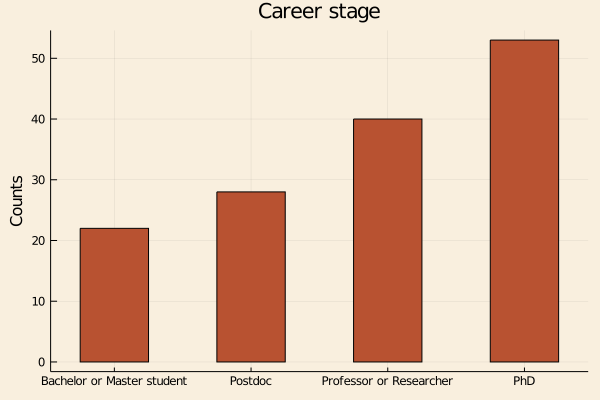

In [100]:
bar(career_breakdown[!,:x1], color="#b85231", leg=false, lw=1., bar_width=0.5, background_color="#f9efde", titlefont=font(14, "Open Sans"))
title!("Career stage")
ylabel!("Counts")
xticks!([1, 2, 3, 4], career_breakdown[!,:Position])